In [2]:
import mlflow
from pycaret.classification import *
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline

In [3]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
def resumetable(df):
    """
    Objective: For a given dataframe this function provides information
    regarding Missing and Unique values per column.

    Input: param df: Dataframe to check the information.

    Output: return summary: a dataframe with columns providing summary per column of the input dataframe.
    
    """
    df = df.copy()
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Missing Percentage'] = df.isnull().sum().values/len(df)
    summary['Uniques'] = df.nunique().values
    return summary

In [5]:
resumetable(df)

Dataset Shape: (891, 12)


,Name,dtypes,Missing,Missing Percentage,Uniques
0,PassengerId,int64,0,0.000000,891
1,Survived,int64,0,0.000000,2
2,Pclass,int64,0,0.000000,3
3,Name,object,0,0.000000,891
4,Sex,object,0,0.000000,2
5,Age,float64,177,0.198653,88
6,SibSp,int64,0,0.000000,7
7,Parch,int64,0,0.000000,7
8,Ticket,object,0,0.000000,681
9,Fare,float64,0,0.000000,248


In [6]:
s = setup(df, target='Survived', log_experiment='mlflow', experiment_name='Titanic')

,Description,Value
0,session_id,5107
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


2022/11/18 17:17:47 INFO mlflow.tracking.fluent: Experiment with name 'Titanic' does not exist. Creating a new experiment.


In [8]:
melhor = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8220,0.0000,0.7478,0.7998,0.7718,0.6264,0.6285,0.0150
dt,Decision Tree Classifier,0.8139,0.7972,0.7080,0.8084,0.7532,0.6055,0.6101,0.0150
rf,Random Forest Classifier,0.8090,0.8453,0.6763,0.8257,0.7425,0.5931,0.6016,0.0510
gbc,Gradient Boosting Classifier,0.8042,0.8565,0.6486,0.8361,0.7280,0.5792,0.5925,0.0530
et,Extra Trees Classifier,0.8027,0.8309,0.6882,0.7967,0.7378,0.5813,0.5857,0.0510
lr,Logistic Regression,0.7994,0.8561,0.7318,0.7648,0.7470,0.5812,0.5826,0.0930
ada,Ada Boost Classifier,0.7947,0.8378,0.6808,0.7880,0.7285,0.5653,0.5708,0.0340
lightgbm,Light Gradient Boosting Machine,0.7883,0.8382,0.6923,0.7663,0.7261,0.5546,0.5576,0.0190
knn,K Neighbors Classifier,0.6888,0.7100,0.5225,0.6474,0.5752,0.3349,0.3416,0.0180
lda,Linear Discriminant Analysis,0.6673,0.6615,0.6237,0.6067,0.6049,0.3212,0.3287,0.0510


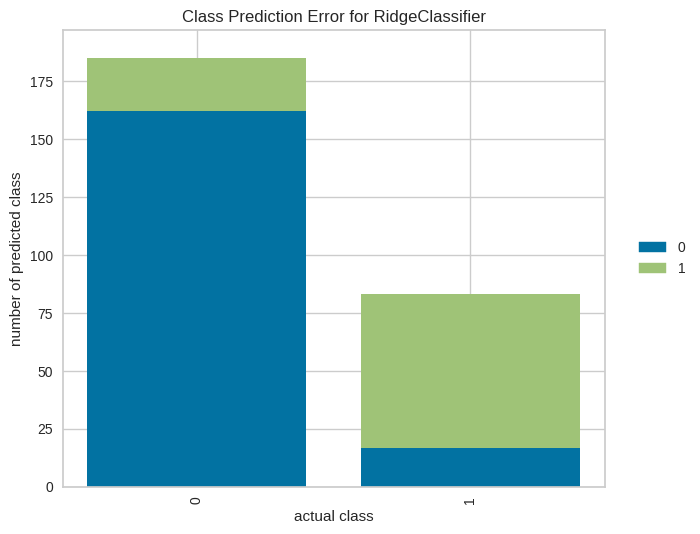

In [12]:
plot_model(melhor,plot='error')

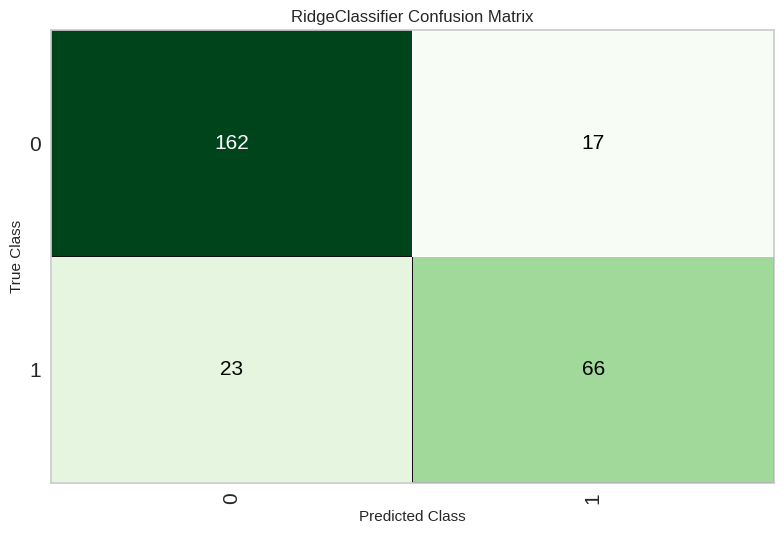

In [13]:
plot_model(melhor, plot='confusion_matrix')

In [14]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [15]:
evaluate_model(melhor)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [16]:
interpret_model(melhor)

ImportError: shap library not found. pip install shap to use interpret_model function.

In [17]:
!pip install shap

     |████████████████████████████████| 575 kB 354 kB/s eta 0:00:01


In [18]:
interpret_model(melhor)

TypeError: This function only supports tree based models for binary classification: rf, dt, et, lightgbm.

In [19]:
predicao = predict_model(melhor,test)

In [20]:
predicao

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [21]:
output = pd.DataFrame({'PassengerId': predicao.PassengerId,'Survived': predicao.Label})
output
#

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [22]:
output.to_csv('submission1.csv', index=False)